<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](colored-bar.png)

## Introduction to Using Spatial Vector Data in Open Source Python

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Vector Data in Python 

In this lesson, you will be introduced to the spatial vector data structure
and the shapefile file format (`.shp`). You will also learn how to open, explore and plot
vector data using the `Geopandas` package in **Python**.


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Describe the characteristics of 3 key vector data structures: points, lines and polygons.
* Open a shapefile in **Python** using **geopandas** - `gpd.read_file()`.
* Plot a shapfile in **Python** using **geopandas** - `gpd.plot()`.

</div>

# TODO: work this into the text
Add this reading as a to do for all of the info below so we are not duplicating information 
Reading: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/ 

## About Spatial Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices determines the type of vector that you are working 
with. There are three types of vector data: 

* **Points:** Each individual point is defined by a single x, y coordinate. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. 
<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png" alt="There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>


## Introduction to the Shapefile File Format Which Stores Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` 
format (`.shp`). Because the structure of points, lines, and polygons are 
different, each individual shapefile can only contain one vector 
type (all points, all lines or all polygons). You will not find 
a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated 
`attributes` that describe the data. For example, a line 
shapefile that contains the locations of streams, might 
contain the associated stream name, stream "order" and other 
information about each stream line object.

<i class="fa fa-star"></i> **Data Tip:** More about shapefiles can found on 
<a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.
{: .notice--success }

## GeoJson Files and other Vector Formats
The shapefile is not the only way that vector data are stored. Geospatial data 
can also be delivered in a GeoJson format, or even a tabular format where the 
spatial information is contained in columns. 

## What Data Are Stored As Spatial Vector?  

Some examples of data that often are provided in a vector format include:

- census data including municipal boundaries
- roads, powerlines and other infrastructure boundaries
- political boundaries
- building outlines
- water bodies and river systems
- ecological boundaries
- city locations
- object locations including plots, stream gages, and building locations


## Import Shapefile Data Into Python Using Geopandas

You will use the **geopandas** library to work with vector data in 
**Python**. **Geopandas** is built on top of the Python pandas library.
It stores spatial data in a tabular, `dataframe` format. 

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

To begin, set your working directory to `earth-analytics and then download a 
single shapefile. You will start with working with the natural earth 
country boundary lines layer.

<i class="fa fa-star"></i> **Data Tip:**  Note that below you are using earthpy 
to download a dataset from naturalearthdata.com. Earthpy creates the earth-analytics
directory for you when you use it. You set the working directory
after you download the data as a precaution to ensure that the earth-analytics
directory already exists on your computer. This is not a standard order of 
operations but we are demonstrating it here to ensure the notebook runs on 
all computers! 
{: .notice--success }

In [2]:
# Download the data and set working directory
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')


# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Next, you open the data using Geopandas. You can view the first 5 rows of the 
data using `.head()` in the same way you used `.head()` for pandas dataframes. 

In [37]:
coastlines_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_coastline.zip"

et.data.get_data(url=coastlines_url)

coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


### GeoPandas Creates GeoDataFrames Which Have the Same Structure As Pandas DataFrames

The structure of a **Geopandas** `GeoDataFrame` is very similar to a 
pandas dataframe. A few differences include 


* the `GeoDataFrame` contains a geometry column which stores spatial information. The geometry column in your GeoDataFrame stores the boundary information (the lines that make up each 
shape in your data). This allows you to plot points, lines or polygons. 
* the`GeoDataFrame` stores spatial attributes such as coordinate reference systems and spatial extents

Similar to pandas you can plot the data using `.plot()`

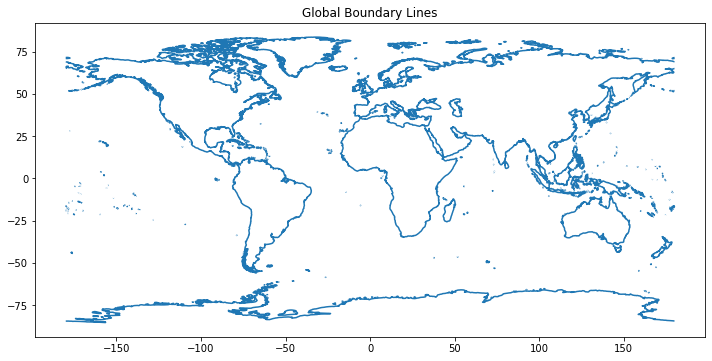

In [36]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)
# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

### Check the Spatial Vector Data Type
You can look at the data to figure out what type of data are stored in the 
shapefiles (points, line or polygons). But you can also get that information 
by calling `.geom_type`

In [6]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0      LineString
1      LineString
2      LineString
3      LineString
4      LineString
          ...    
356    LineString
357    LineString
358    LineString
359    LineString
360    LineString
Length: 361, dtype: object

Also similar to pandas, you can view descriptive information about the 
`GeoDataFrame` using `.info()`. This includes the number of columns, rows 
and the header name and type of each column.

In [7]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   361 non-null    int64   
 1   featurecla  361 non-null    object  
 2   name        0 non-null      object  
 3   min_zoom    361 non-null    float64 
 4   geometry    361 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 14.2+ KB


## Open Vector Point Data

Next, you will open up another shapefile using Geopandas.  

In [8]:
# Open a second layer
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,0,Bombo,0.0,...,8,7,0.0,None,None,0,0,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,0,Fort Portal,0.0,...,7,7,233476.0,None,None,0,0,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,0,Potenza,0.0,...,8,8,3170027.0,None,None,0,0,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,0,Campobasso,0.0,...,8,8,3180991.0,None,None,0,0,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,0,Aosta,0.0,...,7,7,3182997.0,None,None,0,0,7.0,1159117361,POINT (7.31500 45.73700)


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge:  What Geometry Type Are Your Data

Check the geometry type of the cities object that you opened above in the cell below. 

</div>


In [9]:
# Add the code here to check the geometry type of the cities object that you created above

## Creating Maps Using Multiple Shapefiles

You can create maps using multiple shapefiles with Geopandas in a similar way
that you may do this using a graphical user interface (GUI) tool like ArcGIS 
or QGIS (open source alternative to ArcGIS).

To do this you will need to open a second file. The populated places file is 
used below!

To plot two datasets together, you will first create a matplotlib figure object. 
Notice in the example below that you define the figure `ax` in the first line. 
You then tell GeoPandas to plot the data on that particular figure using the 
parameter `ax=`

the code looks like this:

`boundary_lines.plot(ax=ax1)`


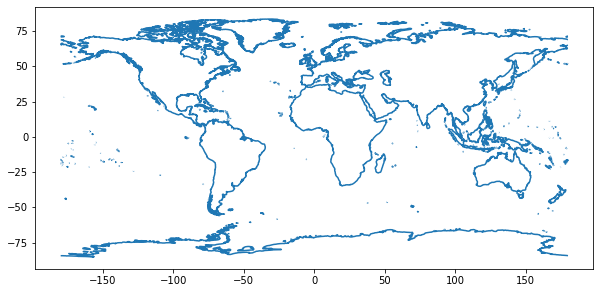

In [38]:
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1)
plt.show()

To add another layer to your map, you can add a second `.plot()` call and 
specify the `ax=` to be `ax1` again. This tells Python to layer the two 
datasets in the same figure. 

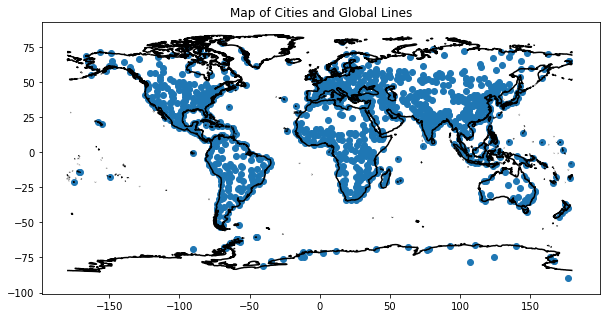

In [39]:
# Create a map or plot with two data layers
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

If you don't specify the axis when you plot, each layer will be plotted on a 
new figure! See the example below

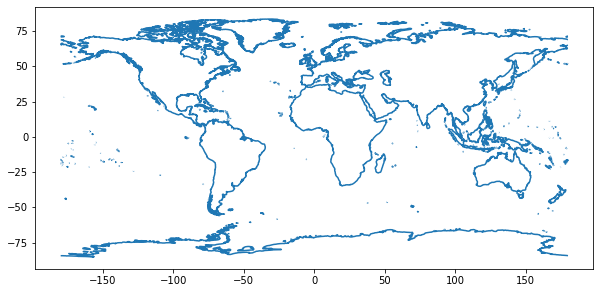

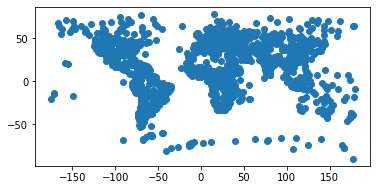

In [40]:
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1)
cities.plot()
plt.show()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Create a Global Map

The code below will download one additional file for you that contains global country 
boundaries. Your goal is to create a map that contains 3 layers:

1. the cities or populated places layer that you opened above
2. the coastlines layer that you opened above and
3. the countries layer that you you will open using the code below

Do the following:
1. Copy the code below that downloads the countries layer, into the cell below. 
2. Next use geopandas `read_file()` to open the countries layer as a `GeoDataFrame`.
3. Create a map of all three layers - in the same figure. The countries should be the bottom layer, the cities and lines should be on top of that layer.  

```python
country_data_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_10m_admin_0_countries", 
                              "ne_10m_admin_0_countries.shp")

### Challenge BONUS: customize your map

If you have time customize your map as follows:
    
* Adjust the linewidth of lines with `linewidth=4`
* Adjust the edge color of polygons using: `edgecolor="grey"`
* Adjust the color of your objects (the line color, or point color) using: `color='springgreen'`. 
    
Finally add a title to your map using
ax1.set(title="my title here")
```

</div>


In [14]:
# Write the code for your map in this cell


<div class="notice--success" markdown="1">
<i class="fa fa-star"></i> **Data Tip:** There are many options to customize plots in Python. Below are 
a few lessons that cover some of this information!

* https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

* https://geopandas.org/gallery/plotting_with_geoplot.html
</div>


## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it.

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png" alt="A shapefile has an associated attribute table. Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate .dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object. Image Source: National Ecological Observatory Network (NEON)"></a>
    <figcaption>Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


The attributes for a shapefile imported into a GeoDataFrame can be viewed in the GeoDataFrame
itself. 

In [23]:
# View first 5 rows of GeoDataFrame
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [44]:
countries.POP_EST

0      260580739
1       31381992
2       17789267
3       11138234
4       31036656
         ...    
250       601969
251            0
252            0
253            0
254            0
Name: POP_EST, Length: 255, dtype: int64

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Vector Metadata

The spatial and attribute data are not the only important aspects of a shapefile. The metadata of a shapefile are also very important. The metadata includes data on the Coordinate Reference System (CRS), the extent, and much more. For more information on what the metadata is, and how to access it, see the full lesson on vector data on the Earth Lab website, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/).</div>

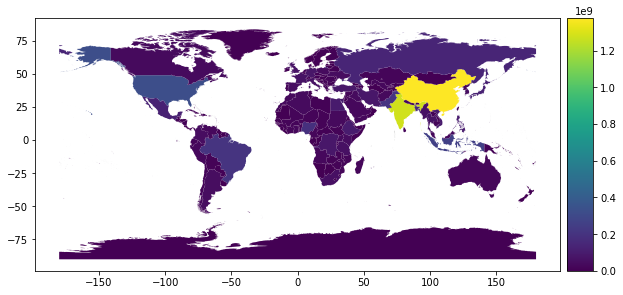

In [58]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax1 = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", 
                          size="5%", 
                          pad=0.1)

countries.plot(column='POP_EST',
               legend=True,
               ax=ax1, cax=cax)
plt.show()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Plot Cities Data

Plot the cities object so each point is colored according to the max population
value. 

HINT: see this page for more information on customizing maps in geopandas:
https://geopandas.org/mapping.html
</div>

In [19]:
# Open your dataset below this line. Make sure to view the geom_type and the first few rows of the dataset

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Plot Cities Data

you can plot your data according to categorical groups similar to what you might do in a tool
like ArcGis or QGIS. See what happens when you customize your plot code above.

Set the following parameters:
* `legend=True` and
* `scheme="quantiles`

</div>


In [ ]:
# Add your plot code here 

The cell below includes a set of tests to see if you correctly completed the activity in the cell above. They will provide you with feedback that can help you complete the activity. 

Be sure to run the cell below to check your code (please do not modify the cell!).

In [20]:
# Run this cell to ensure soap_plot_locations was created correctly

import notebook_tests_data_types

try:
    print(notebook_tests_data_types.test_geopandas_dataframe_creation(
        populated_places)
    )
except NameError:
    print("'populated_places' is not defined. Make sure you spelled the variable name correctly!")

'populated_places' is not defined. Make sure you spelled the variable name correctly!


<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> BONUS Challenge: Clipping Vector Data in Python

You may have noticed that the data above is difficult to read since there are so many points in the point data layer. One of the most common analytical techniques used in earth data science is clipping vector data. A clip is a spatial operation that will take a dataset, and limit it spatially to the extent of another dataset. 

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png" alt="When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI"></a>
    <figcaption>When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI
    </figcaption>
</figure>

For further reading on what clipping is, you can refer to the clipping page on the Earth Lab website, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/). Fear not, we will go over clipping and other spatial data operations soon! 

For this bonus challenge, you will clip the data you've opened, `populated_places`, to the extent of a single country. To clip the data, you will use the `clip()` function in `geopandas`. The syntax of the function is `gpd.clip(data_to_clip, boundary_to_clip_to)`. You can assign the output of this function to a variable, and it will be a GeoDataFrame of the output of the operation. In the below example, `cities_in_mexico` would be a GeoDataFrame containing all of the points in `populated_places` that were within the boundary of the polygon `mexico_boundary`. 

```
cities_in_mexico = gpd.clip(populated_places, mexico_boundary)

```

We subsetted the `countries` dataset and made a GeoDataFrame that is just the boundary of Indonesia. Use that GeoDataFrame to clip `populated_places` to Indonesia. Name the output `cities_in_indonesia`. 

</div>

In [21]:
# Subsetting the countries dataframe to make Indonesian boundary to clip populated_places to.
indonesia_boundary = countries.loc[countries['SOVEREIGNT'] == 'Indonesia']

# Below this line clip the populated_places data to the Indonesian boundary created above.

Now run the next cell to see if you properly clipped the data!

Variable 'cities_in_indonesia' not found. Please make sure you assigned it correctly!


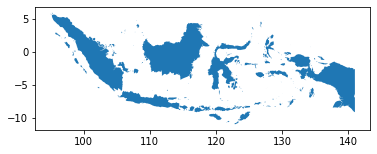

In [22]:
try:
    fig, ax = plt.subplots()

    indonesia_boundary.plot(ax=ax)
    cities_in_indonesia.plot(ax=ax, color='purple')
    ax.set(title="Major Cities in Indonesia")

except NameError:
    print("Variable 'cities_in_indonesia' not found. Please make sure you assigned it correctly!")

Plot the clipped data in the cell below.